# Session 3 Task <img src="https://i.imgur.com/9y2NKWY.png" align="right" width=80/>

This task focuses on:



*   End-to-end machine learning on a classification problem
*   Training multiclass classification models
*   Making sense of confusion matrices and metrics to assess model performances




Reminder: End-to-end Machien Learning steps are to 



1.   Download the data
2.   Understand and Clean the Data
3.   Preprocess and Feature Engineer the Data
4.   Train a model using the data
5.   Measure the model's performance using cross validation
6.   Do hyperparameter tuning on the model and/or try different models
7.   Use the final selected model to make predictions on the test set



In this task, we won't be using pipelines!

This is for a few reasons:



*   There are often a few different ways to accomplish something in data science
you don't need to know all of them but you also shouldn't only have one tool in 
your toolbox 
*   Pipelines hide some of the underlying complexity of preprocessing and 
building models, this is great if you understand how everything works and just
want to deploy to production, but when you're learning it's often a good idea
to tinker with the tools you're using and try to get a better understanding of
how they work. 



<h2> In this task we'll train and select a multiclass classification model to predict whether a car's price is within one of five price categories.<h2>

# First, let's load the data

In [1]:
!gdown 1o2-1X1tRMj5lPS5NOVAfE7gkGqIXC35q
!gdown 1-aMbeDwChOmgRC2ICAM0X3Nvx8PeuyyC
!gdown 1t1HHi_LeAEW5rXkaoTMHYIo2KuJvgLRI

Downloading...
From: https://drive.google.com/uc?id=1o2-1X1tRMj5lPS5NOVAfE7gkGqIXC35q
To: c:\Users\Ahmed Gado\My Drive\Colab Notebooks\task-3\Cars_train.csv

  0%|          | 0.00/895k [00:00<?, ?B/s]
 59%|█████▊    | 524k/895k [00:00<00:00, 1.90MB/s]
100%|██████████| 895k/895k [00:00<00:00, 2.41MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-aMbeDwChOmgRC2ICAM0X3Nvx8PeuyyC
To: c:\Users\Ahmed Gado\My Drive\Colab Notebooks\task-3\Cars_test.csv

  0%|          | 0.00/430k [00:00<?, ?B/s]
100%|██████████| 430k/430k [00:00<00:00, 1.79MB/s]
100%|██████████| 430k/430k [00:00<00:00, 1.79MB/s]
Downloading...
From: https://drive.google.com/uc?id=1t1HHi_LeAEW5rXkaoTMHYIo2KuJvgLRI
To: c:\Users\Ahmed Gado\My Drive\Colab Notebooks\task-3\sample_submission.csv

  0%|          | 0.00/36.3k [00:00<?, ?B/s]
100%|██████████| 36.3k/36.3k [00:00<00:00, 752kB/s]


Note: We'll drop the id column from the test set since the sample submission file has the same order as the test_df

In [2]:
import pandas as pd
#Helps make printing numbers look better
pd.options.display.float_format = '{:.2f}'.format

train_df = pd.read_csv("Cars_train.csv")

test_df = pd.read_csv("Cars_test.csv")
test_df = test_df.drop('id', axis=1)

# Let's have a quick look at the dataset

<h1><b>Q1: Use some pandas built-in functions like head, describe, value_counts, etc. to take an initial look at train_df</b></h1>

In [3]:
train_df.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov,price_category
0,Chevrolet,Aveo,Sedan,Gray,2018,Benzine,100000 to 119999,1400 - 1500 CC,Automatic,207.00,Alexandria,2
1,Hyundai,Accent,Sedan,Silver,2008,Benzine,180000 to 199999,1000 - 1300 CC,Manual,95.50,Qena,0
2,Hyundai,Matrix,Hatchback,Other Color,2001,Benzine,180000 to 199999,1600 CC,Automatic,132.00,Alexandria,1
3,Fiat,Punto,Hatchback,White,2006,Benzine,140000 to 159999,1000 - 1300 CC,Manual,74.80,Cairo,0
4,Chevrolet,Cruze,Sedan,Gray,2016,Benzine,140000 to 159999,1600 CC,Automatic,195.50,Cairo,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9876 entries, 0 to 9875
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           9876 non-null   object 
 1   Model           9876 non-null   object 
 2   Body            9876 non-null   object 
 3   Color           9876 non-null   object 
 4   Year            9876 non-null   int64  
 5   Fuel            9876 non-null   object 
 6   Kilometers      9876 non-null   object 
 7   Engine          9876 non-null   object 
 8   Transmission    9876 non-null   object 
 9   Price           9876 non-null   float64
 10  Gov             9876 non-null   object 
 11  price_category  9876 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 926.0+ KB


In [5]:
train_df.describe()

,Year,Price,price_category
count,9876.00,9876.00,9876.00
mean,2005.51,116.67,0.73
std,12.63,82.13,0.80
min,1971.00,3.00,0.00
25%,1998.00,43.70,0.00
50%,2010.00,110.00,1.00
75%,2015.00,161.00,1.00
max,2022.00,471.50,4.00


In [6]:
train_df.isna().sum()

Brand             0
Model             0
Body              0
Color             0
Year              0
Fuel              0
Kilometers        0
Engine            0
Transmission      0
Price             0
Gov               0
price_category    0
dtype: int64

In [7]:
train_df['Kilometers'].value_counts()

More than 200000    1660
10000 to 19999      1104
180000 to 199999     929
100000 to 119999     811
140000 to 159999     718
0 to 9999            713
120000 to 139999     658
90000 to 99999       632
160000 to 179999     537
20000 to 29999       431
80000 to 89999       373
50000 to 59999       303
40000 to 49999       256
60000 to 69999       254
70000 to 79999       253
30000 to 39999       244
Name: Kilometers, dtype: int64

In [8]:
train_df['price_category'].value_counts()

0    4461
1    4055
2    1002
3     324
4      34
Name: price_category, dtype: int64

In [9]:
train_df.corr()

C:\Users\Ahmed Gado\AppData\Local\Temp\ipykernel_21060\1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,Year,Price,price_category
Year,1.00,0.77,0.69
Price,0.77,1.00,0.95
price_category,0.69,0.95,1.00


As we see, we have price_category ranging from 0 to 4, each category meaning 0 to 100K, 100K to 200K, etc.

The Price column is not needed since we're framing this as a classification problem. 
I only left it in case you're curious how much each car actually cost 💰 (Be careful since the dataset was actually collected about 5 months ago so the majority of the prices you see in the dateset are a bit lower (okay, maybe much lower) than the current price

<h2><b>Don't forget to run the next cell to drop the Price column before training</b><h2>



In [10]:
train_df = train_df.drop('Price', axis=1)

<h1><b>Q2: Use any visualization library you like to visualize some of the datasets attributes. Hint: One idea is to try plotting bar plots of categorical variables against the target variable like in the next cell. Other solutions are also welcome. </b></h1>

<AxesSubplot: xlabel='price_category'>

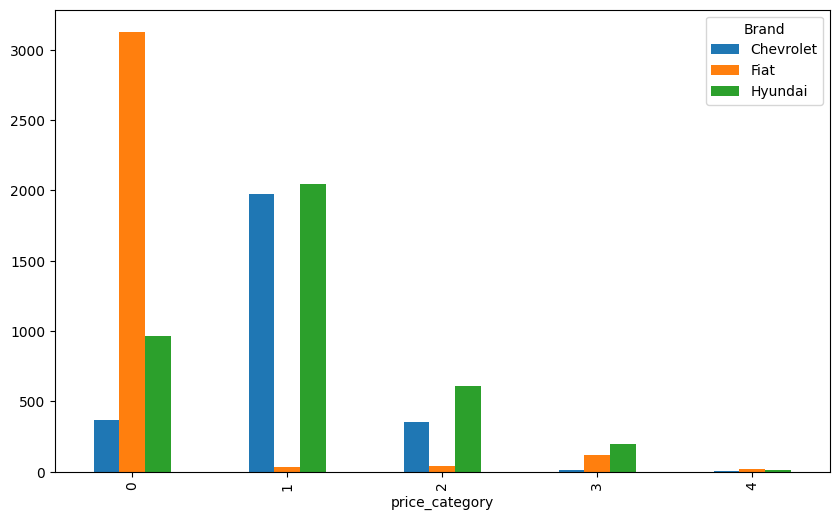

In [11]:
train_df.groupby('price_category').Brand.value_counts().unstack().plot(kind='bar', figsize=(10,6))

Try looking for trends and trying to ask and answer questions about the dataset,
like are cars more likely to be more expensive the more recent they are?
The next cell tries to answer that question.

But always be careful not to jump into conclusions too early!

array([<AxesSubplot: ylabel='2011'>, <AxesSubplot: ylabel='2012'>,
       <AxesSubplot: ylabel='2013'>, <AxesSubplot: ylabel='2014'>,
       <AxesSubplot: ylabel='2015'>, <AxesSubplot: ylabel='2016'>,
       <AxesSubplot: ylabel='2017'>, <AxesSubplot: ylabel='2018'>,
       <AxesSubplot: ylabel='2019'>, <AxesSubplot: ylabel='2020'>,
       <AxesSubplot: ylabel='2021'>, <AxesSubplot: ylabel='2022'>],
      dtype=object)

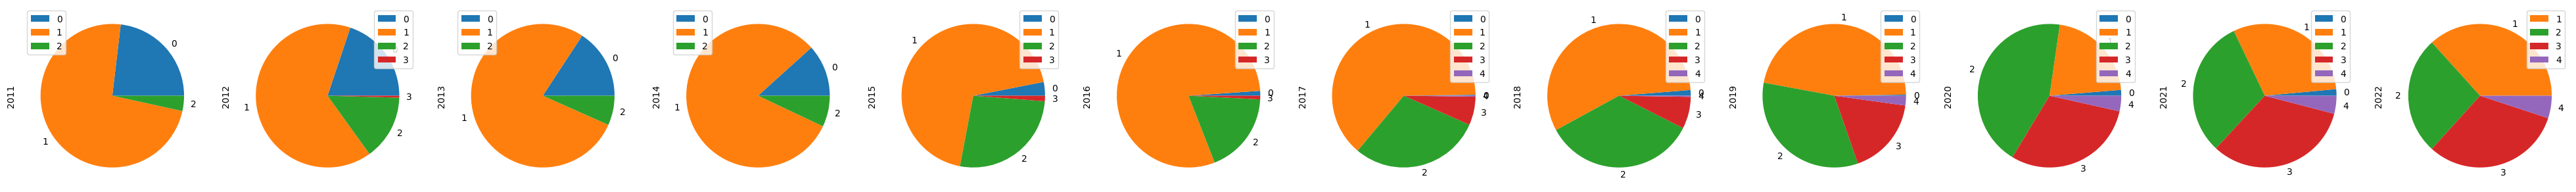

In [12]:
train_df[train_df.Year > 2010].groupby('price_category').Year.value_counts().unstack().plot(kind='pie', figsize=(50,50), subplots=True)

<AxesSubplot: xlabel='price_category', ylabel='Year'>

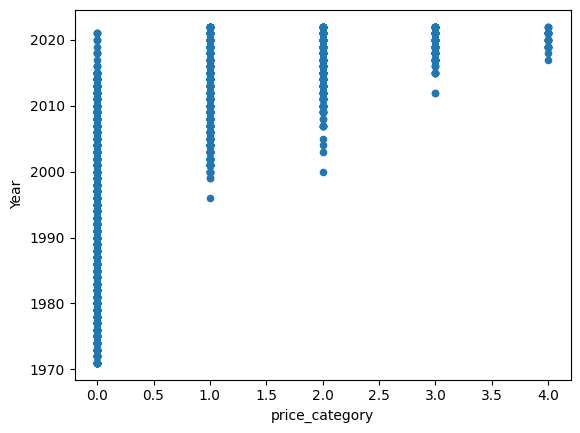

In [13]:
train_df.plot(kind='scatter', x= 'price_category', y= 'Year')

# Prepare the Data for Machine Learning Algorithms

<h1><b>Q3.1: Show the dtypes of each column in the dataset.</b></h1>

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9876 entries, 0 to 9875
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           9876 non-null   object
 1   Model           9876 non-null   object
 2   Body            9876 non-null   object
 3   Color           9876 non-null   object
 4   Year            9876 non-null   int64 
 5   Fuel            9876 non-null   object
 6   Kilometers      9876 non-null   object
 7   Engine          9876 non-null   object
 8   Transmission    9876 non-null   object
 9   Gov             9876 non-null   object
 10  price_category  9876 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 848.8+ KB


<h1><b>Q3.2: Use the 'select_dtypes' method in pandas to select columns which have the dtype 'object', assign that to a variable called cat_columns</b></h1>

Note: For questions requiring you to complete pieces of code, some comments will be explanatory and others will require you to write code.

Comments that are part of a question are prefixed with TODO: to make it easier to find.

In [15]:
cat_columns = ['Brand', 'Model', 'Body', 'Color', 'Fuel', 'Kilometers', 'Engine','Transmission', 'Gov']

num_columns = ['Year'] 

cat_columns = list(train_df.select_dtypes('object').columns)

The following cell demonstrates how to:


*   Transform categorical variable to one hot encoded variables
*   Create a pandas dataframe from the transformed array


But what if we want to join the created dataframe (which only contains the one hot representation of categorical variables) to the original dataframe?

The next two questions illustrate this.

First: Run the next cell







In [16]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

# enc.fit(train_df[cat_columns])

train_cat_one_hot = enc.fit_transform(train_df[cat_columns])

train_cat_one_hot_df = pd.DataFrame(train_cat_one_hot.toarray(), 
                                    columns=enc.get_feature_names_out(),
                                    index=train_df.index)

train_cat_one_hot_df

,Brand_Chevrolet,Brand_Fiat,Brand_Hyundai,Model_128,Model_131,Model_Accent,Model_Avante,Model_Aveo,Model_Cruze,Model_Elantra,...,Gov_Monufia,Gov_New Valley,Gov_Port Said,Gov_Qalyubia,Gov_Qena,Gov_Red Sea,Gov_Sharqia,Gov_Sohag,Gov_South Sinai,Gov_Suez
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9872,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
9873,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9874,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<h1><b>Q3.3: Now use the function `pd.concat` to concatenate `train_df` and`train_cat_one_hot_df`. Pay special attention to the axis argument of pd.`concat`  </b></h1>

In [17]:
train_df = pd.concat([train_df, train_cat_one_hot_df], axis= 1)
train_df.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Gov,...,Gov_Monufia,Gov_New Valley,Gov_Port Said,Gov_Qalyubia,Gov_Qena,Gov_Red Sea,Gov_Sharqia,Gov_Sohag,Gov_South Sinai,Gov_Suez
0,Chevrolet,Aveo,Sedan,Gray,2018,Benzine,100000 to 119999,1400 - 1500 CC,Automatic,Alexandria,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Hyundai,Accent,Sedan,Silver,2008,Benzine,180000 to 199999,1000 - 1300 CC,Manual,Qena,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,Hyundai,Matrix,Hatchback,Other Color,2001,Benzine,180000 to 199999,1600 CC,Automatic,Alexandria,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Fiat,Punto,Hatchback,White,2006,Benzine,140000 to 159999,1000 - 1300 CC,Manual,Cairo,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Chevrolet,Cruze,Sedan,Gray,2016,Benzine,140000 to 159999,1600 CC,Automatic,Cairo,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<h1><b>Q3.4: Now drop cat_columns from the train_df since they are already one hot encoded </b></h1>

In [18]:
train_df = train_df.drop(cat_columns, axis= 1)
train_df.head()

,Year,price_category,Brand_Chevrolet,Brand_Fiat,Brand_Hyundai,Model_128,Model_131,Model_Accent,Model_Avante,Model_Aveo,...,Gov_Monufia,Gov_New Valley,Gov_Port Said,Gov_Qalyubia,Gov_Qena,Gov_Red Sea,Gov_Sharqia,Gov_Sohag,Gov_South Sinai,Gov_Suez
0,2018,2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2008,0,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,2001,1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2006,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2016,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<h1><b>Q4: Use MinMaxScaler to transform num_columns to be in the range 0-1 </b></h1>

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# scaler.fit(train_df[num_columns])

train_df[num_columns] = scaler.fit_transform(train_df[num_columns])
train_df[num_columns]

,Year
0,0.92
1,0.73
2,0.59
3,0.69
4,0.88
...,...
9871,0.76
9872,0.63
9873,0.90
9874,0.88


<h1><b>Q5: Put all of that into one preprocessing function! </b></h1>

The string following the function declaration is called a docstring. 

It's a clean way to include documentation inside the code
Data science usually doesn't have a lot of clean code but
it's the right way to do things.

You don't *need* to write docstrings for your functions in
any of our tasks -this isn't the software engineering committee!-
but it's just something to keep in mind for the future

In [20]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

def preprocess(train_df, test_df=None):
    """Performs preprocessing on a Pandas DataFrame. 
    Optionally applies the same preprocessing steps
    to transform a test dataframe if provided.

    
    Parameters
    ----------
    train_df: Pandas DataFrame
        The dataframe to do preprocessing on. 
    test_df:  Pandas DataFrame
        Optional. The test dataframe in case it exists.
    
    Returns
    -------

    train_df Pandas DataFrame
        The preprocessed training dataframe. 
    test_df [Pandas DataFrame or None]
        The preprocessed test dataframe. 
        If no dataframe is provided then it's None.
    """

    cat_columns = ['Brand', 'Model', 'Body', 'Color', 'Fuel', 'Kilometers', 'Engine','Transmission', 'Gov']

    num_columns = ['Year'] 

    enc = OneHotEncoder(handle_unknown='ignore')

    enc.fit(train_df[cat_columns])

    train_cat_one_hot = enc.transform(train_df[cat_columns])

    train_cat_one_hot_df = pd.DataFrame(train_cat_one_hot.toarray(), 
                                        columns=enc.get_feature_names_out(),
                                        index=train_df.index)

    train_df = pd.concat([train_df, train_cat_one_hot_df], axis= 1)
    train_df = train_df.drop(cat_columns, axis= 1)

    scaler = MinMaxScaler()
    scaler.fit(train_df[num_columns])

    train_df[num_columns] = scaler.transform(train_df[num_columns])
    


    #This is to ensure the same preprocessing steps we did to train_df
    #are applied to test_df
    #It's the exact same code as above but with test_df instead of train_df
    if test_df is not None:

        test_cat_one_hot = enc.transform(test_df[cat_columns])

        test_cat_one_hot_df = pd.DataFrame(test_cat_one_hot.toarray(), 
                                            columns=enc.get_feature_names_out(),
                                            index=test_df.index)

        test_df = pd.concat([test_df, test_cat_one_hot_df], axis= 1)
        test_df = test_df.drop(cat_columns, axis= 1)

        
        test_df[num_columns] = scaler.transform(test_df[num_columns])
        
        #Note that we don't fit scaler or encoder to test_df. 
        #We only transform them

    return train_df, test_df

After calling the function, the two dataframes should now be preprocessed.

Note that we need to load the data again because we edited it in the previous cells.

In [21]:
train_df = pd.read_csv("Cars_train.csv")
train_df = train_df.drop('Price', axis=1)
test_df = pd.read_csv("Cars_test.csv")
test_df = test_df.drop('id', axis=1)

train_df, test_df = preprocess(train_df, test_df)

# Training and Cross-Validation

<h1><b>Q6: Create a variable X, that consists of train_df without the target variable, and another variable y consisting of just the target variable </b></h1>

In [22]:
X = train_df.drop(['price_category'], axis= 1)
y = train_df['price_category']

The next cell demonstrates K-Fold Cross Validation 
*   We'll try doing hyperparameter tuning manually this time
*   Try different models and try different combinations of hyperparameters
*   You'll need to solve all of the next cell for the code to work


<h1><b>Q7: Fill in the missing pieces of code as indicated by the comments. Then, Try running the DummyClassifier and notice its performance. 
Now try different models and different hyperparameter combinations manually and see how far you can fly! 

(Don't worry it's not too far. Not because of you but because of the dataset ¯\\_(ツ)_/¯) </b></h1>

In [23]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier

def train_model(model, X=X, y=y, K=5, **model_params):
    
    skf = StratifiedKFold(n_splits=K, random_state=0, shuffle=True)

    #We need to turn X and y into numpy array before inputting them to the model
    X = X.to_numpy()
    y = y.to_numpy()

    fold_number = 1

    avg_accuracy = 0
    avg_precision = 0
    avg_recall = 0
    avg_f1 = 0

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf = model(**model_params)

        clf.fit(X_train, y_train)

        preds = clf.predict(X_test)

        accuracy = accuracy_score(y_test, preds)

        #The 'macro' helps generalize precision, recall, and f1 
        #from binary to multiclass classification
        #See: https://stephenallwright.com/micro-vs-macro-f1-score/
        #For more information
        precision = precision_score(y_test, preds, average='macro', zero_division= True)
        recall = recall_score(y_test, preds, average= 'macro')
        f1 = f1_score(y_test, preds, average= 'macro')

        #This prints metrics for each fold
        print(f"# fold number {fold_number}:")
        print(f"\tAccuracy          : {accuracy}")
        print(f"\tPrecision         : {precision}")
        print(f"\tRecall for fold   : {recall}")
        print(f"\tF1 Score for fold : {f1}\n")

        #This helps when calculating the average of metrics across folds
        avg_accuracy += accuracy
        avg_precision += precision
        avg_recall += recall
        avg_f1 += f1

        fold_number += 1
    

    print(f"Average (Out of fold) Accuracy  : {avg_accuracy/K}")
    print(f"Average (Out of fold) Precision : {avg_precision/K}")
    print(f"Average (Out of fold) Recall    : {avg_recall/K}")
    print(f"Average (Out of fold) F1        : {avg_f1/K}")

    return y_test, preds


In [24]:
y_test, preds = train_model(K= 5, model= LogisticRegression, penalty= 'l2', C=1, max_iter=10000)

[0 0 0 ... 1 1 1]
# fold number 1:
	Accuracy          : 0.8507085020242915
	Precision         : 0.7790883704494618
	Recall for fold   : 0.5424320388132872
	F1 Score for fold : 0.5568459514849995

[1 2 2 ... 1 2 1]
# fold number 2:
	Accuracy          : 0.8455696202531645
	Precision         : 0.5832910417196028
	Recall for fold   : 0.526754851925938
	F1 Score for fold : 0.5443631325682532

[1 0 2 ... 1 0 1]
# fold number 3:
	Accuracy          : 0.8410126582278481
	Precision         : 0.5812900024984831
	Recall for fold   : 0.5238885569430962
	F1 Score for fold : 0.5421166693125334



KeyboardInterrupt: 

In [ ]:
y_test, preds = train_model(model= RandomForestClassifier)

# fold number 1:
	Accuracy          : 0.8906882591093117
	Precision         : 0.6803493475210544
	Recall for fold   : 0.666318399362813
	F1 Score for fold : 0.6719669935218866

# fold number 2:
	Accuracy          : 0.8739240506329113
	Precision         : 0.6210109840638877
	Recall for fold   : 0.604698716931406
	F1 Score for fold : 0.6120620606455791

# fold number 3:
	Accuracy          : 0.8891139240506329
	Precision         : 0.639742513401117
	Recall for fold   : 0.6230980064151511
	F1 Score for fold : 0.6308346837058801

# fold number 4:
	Accuracy          : 0.8855696202531645
	Precision         : 0.7322831013053271
	Recall for fold   : 0.6561608354377786
	F1 Score for fold : 0.674161445082375

# fold number 5:
	Accuracy          : 0.88
	Precision         : 0.6831000712581715
	Recall for fold   : 0.637470073412181
	F1 Score for fold : 0.6553113078417122

Average (Out of fold) Accuracy  : 0.8838591708092041
Average (Out of fold) Precision : 0.6712972035099115
Average (Out of fold) R

The next cell displays the confusion matrix for the model using the very last values preds and y_test that were assigned in the loop.

What do you notice about the model? What kind of classes does it confuse the most? Is the model overfitting? Try to think about these questions and let that guide you when choosing a model and doing hyperparameter tuning.

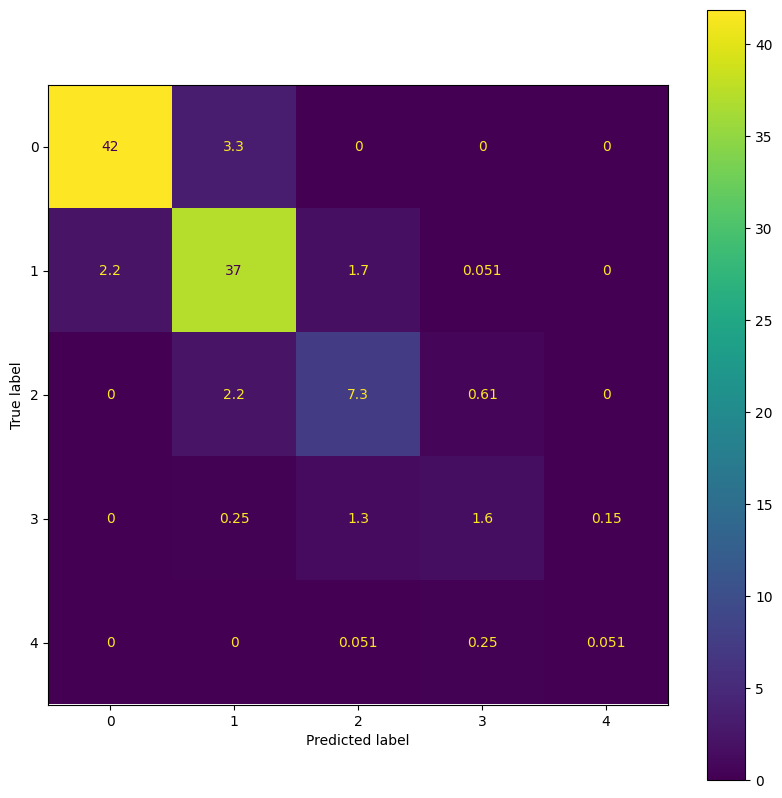

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#The normalize="all" displays ratios instead of just frequencies
#Multiplied by 100 for percentages
#If you want to see the frequencies just remove normalize='all' and the * 100
cm = confusion_matrix(y_test, preds, normalize="all") * 100
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)

Now that you've used K-Fold Cross validation to choose a model, train the model you chose on all of the available data.

<b>Remember that we only use K-Fold to get an estimate of each model's performance to be able to select a model, but when we've selected a model we want to train it on all available data, not just 4/5 on it in case of 5-Fold cross validation</b>

<h1><b>Q8: For the final piece of the puzzle, fill in the next cell with the best model and hyperparameters you found using cross validation and train it on all the labeled data to be able to get predictions on the test set</b></h1>

In [ ]:

X

,Year,Brand_Chevrolet,Brand_Fiat,Brand_Hyundai,Model_128,Model_131,Model_Accent,Model_Avante,Model_Aveo,Model_Cruze,...,Gov_Monufia,Gov_New Valley,Gov_Port Said,Gov_Qalyubia,Gov_Qena,Gov_Red Sea,Gov_Sharqia,Gov_Sohag,Gov_South Sinai,Gov_Suez
0,0.92,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.73,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,0.59,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.69,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.88,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,0.76,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9872,0.63,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
9873,0.90,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9874,0.88,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
clf = LogisticRegression(penalty= 'l2', C=1, max_iter=10000)

clf.fit(X, y)

#Turn test_df into a numpy array and get the predictions
test_df = test_df.to_numpy()
preds = clf.predict(test_df)

c:\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<h2><b>Don't forget to submit the form and upload your submission to Kaggle:</h2></b>

Form link:

https://forms.gle/8YYY5WAFhMQfrBJM9

Kaggle link:

https://www.kaggle.com/t/f21a20616b5f4e14b1dd03880225e9c7

In [ ]:
submission = pd.read_csv("sample_submission.csv")

submission.price_category = preds

submission.to_csv("cars_submission.csv", index=False)

<h1><b>Q9 (Optional) (Bonus): In case you're feeling adventrous, try running both GridSearchCV and RandomSearchCV for cross validation. (You can provide them the full X and y sets and they will handle the train/valid split).
 Did they get a better score than your hand-picked parameters? If so, by how much?</b></h1>

<h1><b>Aaaand we're done! Congratulations on making it this far! 🎉🎉🎉</b></h1>